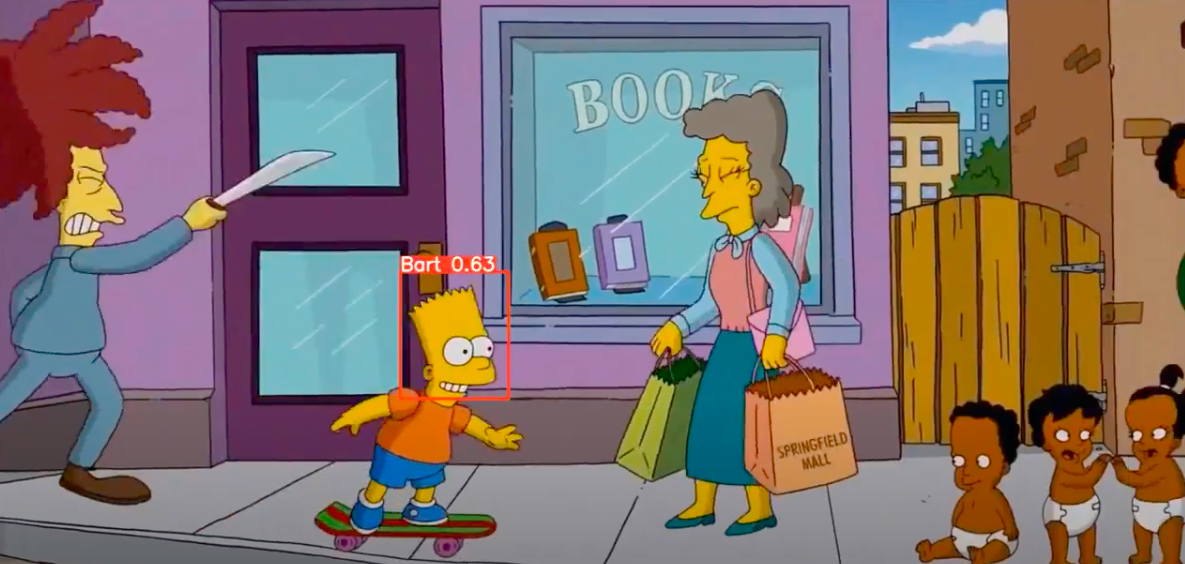

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla K80)


In [5]:
!unzip -q /content/drive/MyDrive/Computer-Vision/train_data.zip -d ../

In [9]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 2 --epochs 10 --data /content/drive/MyDrive/Computer-Vision/custom_data.yaml --weights /content/drive/MyDrive/Computer-Vision/best.pt --cache

train: weights=/content/drive/MyDrive/Computer-Vision/best.pt, cfg=, data=/content/drive/MyDrive/Computer-Vision/custom_data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=10, batch_size=2, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=30
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-405-gfad57c2 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0

In [10]:
import shutil
shutil.copy("runs/train/exp3/weights/best.pt", "/content/drive/MyDrive/Computer-Vision/best.pt")

'/content/drive/MyDrive/Computer-Vision/best.pt'

In [11]:
!python detect.py --weights /content/drive/MyDrive/Computer-Vision/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/Computer-Vision/simpsons-intro.mp4


detect: weights=['/content/drive/MyDrive/Computer-Vision/best.pt'], source=/content/drive/MyDrive/Computer-Vision/simpsons-intro.mp4, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-405-gfad57c2 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
video 1/1 (1/464) /content/drive/MyDrive/Computer-Vision/simpsons-intro.mp4: 384x640 Done. (0.027s)
video 1/1 (2/464) /content/drive/MyDrive/Computer-Vision/simpsons-intro.mp4: 384x640 Done. (0.024s)
video 1/1 (3/464) /content/drive/MyDrive/Computer-Vision/simpsons-intro.mp4: 384x640 1 Bart, Done. (0.027s)
video 1/1 (4/464) /content/drive/MyDrive/Co

In [12]:
shutil.copy("/content/yolov5/runs/detect/exp/simpsons-intro.mp4", "/content/drive/MyDrive/Computer-Vision/simpsons-intro-labels.mp4")

'/content/drive/MyDrive/Computer-Vision/simpsons-intro-labels.mp4'